In [1]:
# pip install keras

In [2]:
# pip install tensorflow

In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [5]:
df = pd.read_csv('data/model.csv')
df.head()

,Date,Price,Open,High,Low
0,2014-04-01,36.11,35.50,36.29,34.76
1,2014-04-02,36.31,36.27,36.44,35.91
2,2014-04-03,35.86,36.27,37.07,35.51
3,2014-04-04,36.17,36.03,36.40,35.59
4,2014-04-07,36.53,36.53,36.81,35.85


In [58]:
df.tail()

,Date,Price,Open,High,Low
2463,2024-03-18,149.60,143.85,150.25,142.20
2464,2024-03-19,148.65,149.55,152.55,147.55
2465,2024-03-20,145.70,149.70,150.70,143.85
2466,2024-03-21,150.15,148.05,151.15,147.90
2467,2024-03-22,151.50,148.05,152.75,148.60


In [6]:
cop = df.reset_index()['Price']
cop

0        36.11
1        36.31
2        35.86
3        36.17
4        36.53
         ...  
2463    149.60
2464    148.65
2465    145.70
2466    150.15
2467    151.50
Name: Price, Length: 2468, dtype: float64

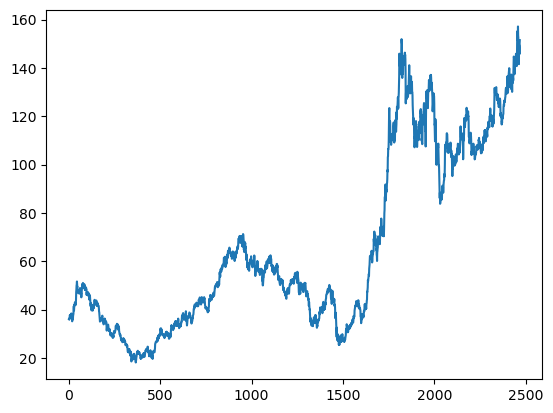

In [7]:
plt.plot(cop)

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
cop = scaler.fit_transform(np.array(cop).reshape(-1,1))

In [9]:
len(cop)

2468

In [10]:
trainingSize = int(len(cop)*0.80)
testSize = len(cop)-trainingSize

train_data, test_data = cop[0:trainingSize,:],cop[trainingSize:len(cop),:1]

In [11]:
len(train_data),len(test_data)

(1974, 494)

In [12]:
def create_data(data,time_step):
    X, y = [],[]
    for i in range(len(data)-time_step-1):
        a = data[i:(i+time_step),0]
        b = data[i+time_step,0]
        X.append(a)
        y.append(b)

    return np.array(X), np.array(y)

In [32]:
time_step = 100
X_train, y_train = create_data(train_data,time_step)
X_test, y_test = create_data(test_data,time_step)

In [33]:
print(X_train.shape), print(y_train.shape)

(1873, 100)
(1873,)


(None, None)

In [34]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

In [38]:
def buildModel(input_shape):
    input_layer = Input(shape=input_shape)
    model = LSTM(units=128,return_sequences=True)(input_layer)
    model = Dropout(0.2)(model)
    model = LSTM(units=128,return_sequences=True)(model)
    model = Dropout(0.2)(model)
    model = LSTM(units=128,return_sequences=False)(model)
    model = Dropout(0.2)(model)
    model = Dense(64,activation='relu')(model)
    model = Dropout(0.2)(model)
    model = Dense(64,activation='relu')(model)
    output_layer = Dense(1)(model)
    neuron = Model(inputs=input_layer,outputs=output_layer)
    neuron.compile(loss='mean_squared_error',optimizer='adam')
    return neuron

In [39]:
clf = buildModel((100,1))
clf.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 100, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 128)       │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 342,209 (1.31 MB)

 Trainable params: 342,209 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
hist = clf.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=64)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 335ms/step - loss: 0.0566 - val_loss: 0.0020
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 326ms/step - loss: 0.0038 - val_loss: 0.0087
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 343ms/step - loss: 0.0027 - val_loss: 0.0156
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 327ms/step - loss: 0.0023 - val_loss: 0.0319
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 339ms/step - loss: 0.0023 - val_loss: 0.0183
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 379ms/step - loss: 0.0025 - val_loss: 0.0219
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 341ms/step - loss: 0.0016 - val_loss: 0.0070
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 353ms/step - loss: 0.0014 - val_loss: 0.0250
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 342ms/step - loss: 0.0014 - val_loss: 0.0376
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 360ms/step - loss: 0.0019 - val_loss: 0.0191
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 365ms/step - loss: 0.0013 - val_loss: 0.0076
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 11

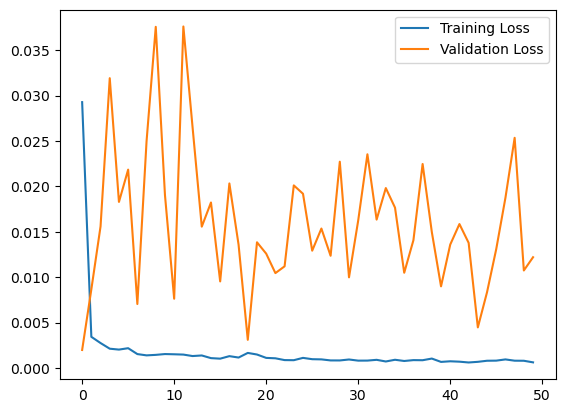

In [41]:
plt.plot(hist.history['loss'],label='Training Loss')
plt.plot(hist.history['val_loss'],label='Validation Loss')
plt.legend()
plt.show()

In [42]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [43]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [44]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

60.49233106967314

In [45]:
math.sqrt(mean_squared_error(y_test,test_predict))

117.18439269651704

In [46]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error
mae = mean_absolute_error(y_train,train_predict)
maep = mean_absolute_percentage_error(y_train,train_predict)
print(mae,maep)

53.094265768503725 48424864248682.766


In [47]:
mae_pred = mean_absolute_error(y_test,test_predict)
maep_pred = mean_absolute_percentage_error(y_test,test_predict)
print(mae_pred,maep_pred)

116.55088231848403 162.64322428893078


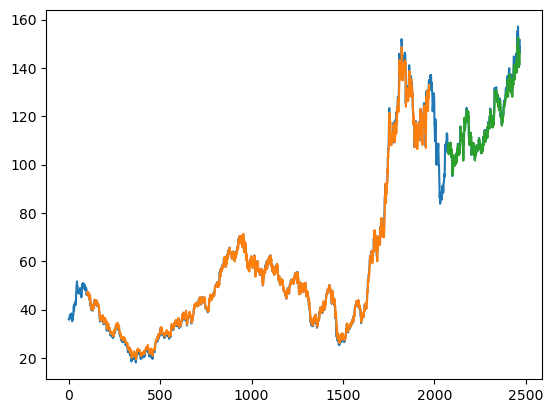

In [48]:
look_back=100
trainPredictPlot = np.empty_like(cop)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(cop)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(cop)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(cop))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [49]:
len(test_data)

494

In [50]:
x_input = test_data[394:].reshape(1,-1)
x_input.shape

(1, 100)

In [51]:
temp_in = list(x_input)
temp_in = temp_in[0].tolist()

In [52]:
temp_in

[0.7083363302884268,
 0.7194850032367115,
 0.7133712148457166,
 0.7284758685175861,
 0.730993310796231,
 0.7259584262389411,
 0.730633676184996,
 0.7335107530748758,
 0.7389052722434006,
 0.7396245414658706,
 0.7615622527512047,
 0.7665971373084945,
 0.7698338488096094,
 0.7647989642523196,
 0.777745810256779,
 0.776666906423074,
 0.780982521757894,
 0.7752283679781342,
 0.7820614255915989,
 0.7881752139825936,
 0.7899733870387685,
 0.8043587714881678,
 0.8115514637128676,
 0.8162267136589224,
 0.8176652521038624,
 0.8047184060994029,
 0.7989642523196431,
 0.805078040710638,
 0.8057973099331079,
 0.8144285406027475,
 0.8191037905488023,
 0.8507516363374811,
 0.852190174782421,
 0.8435589441127814,
 0.8025605984319929,
 0.8119110983241027,
 0.8298928288858519,
 0.8421204056678413,
 0.8561461555060058,
 0.8633388477307056,
 0.87304898223405,
 0.8759260591239301,
 0.8734086168452851,
 0.8428396748903114,
 0.8352873480543767,
 0.8309717327195569,
 0.8194634251600375,
 0.8309717327195569,
 

In [53]:
lst_output=[]
n_steps=100
i=0
while(i<10):
    
    if(len(temp_in)>100):
        #print(temp_input)
        x_input=np.array(temp_in[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_in.extend(yhat[0].tolist())
        temp_in=temp_in[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_in.extend(yhat[0].tolist())
        print(len(temp_in))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9294197]
101
1 day input [0.719485   0.71337121 0.72847587 0.73099331 0.72595843 0.73063368
 0.73351075 0.73890527 0.73962454 0.76156225 0.76659714 0.76983385
 0.76479896 0.77774581 0.77666691 0.78098252 0.77522837 0.78206143
 0.78817521 0.78997339 0.80435877 0.81155146 0.81622671 0.81766525
 0.80471841 0.79896425 0.80507804 0.80579731 0.81442854 0.81910379
 0.85075164 0.85219017 0.84355894 0.8025606  0.8119111  0.82989283
 0.84212041 0.85614616 0.86333885 0.87304898 0.87592606 0.87340862
 0.84283967 0.83528735 0.83097173 0.81946343 0.83097173 0.83420844
 0.8399626  0.84283967 0.84032223 0.85686542 0.81658635 0.81227073
 0.83492771 0.83276991 0.80543768 0.84176077 0.83097173 0.84068187
 0.83852406 0.84715529 0.83924333 0.86729483 0.88743437 0.91045098
 0.90793354 0.90325829 0.88599583 0.85794433 0.86154067 0.88491692
 0.88527656 0.89354816 0.89031144 0.88419766 0.90433719 0.91872258
 0.91620514 0.89534633 0.906495   0.88203985 0.88311875 0.94857225
 0.98561462 0.9708696  0.96187873 

In [54]:
scaled_pred = scaler.inverse_transform(lst_output)
print(scaled_pred)

[[147.33722038]
 [142.59270144]
 [140.37322218]
 [138.93003693]
 [137.25305524]
 [135.68487968]
 [134.33021439]
 [133.11444472]
 [132.00202016]
 [130.98206837]]


In [55]:
len(cop)

2468

In [56]:
day_new=np.arange(1,101)
day_pred=np.arange(101,111)

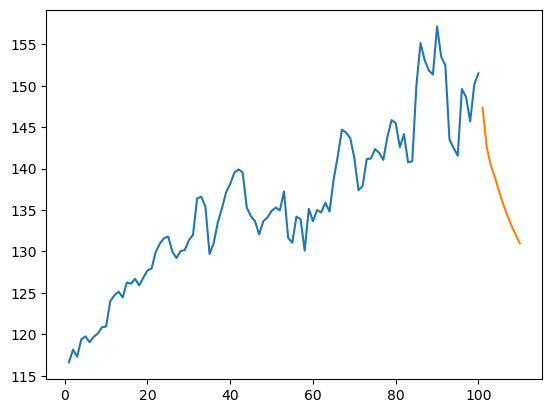

In [57]:
plt.plot(day_new,scaler.inverse_transform(cop[2368:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))